In [1]:
#Comienzo descargando los archivos del repositorio
!wget eyes.jpg https://github.com/juannieu/VPC1/raw/main/TP3/eyes.jpg

--2022-04-06 01:49:59--  http://eyes.jpg/
Resolving eyes.jpg (eyes.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘eyes.jpg’
--2022-04-06 01:49:59--  https://github.com/juannieu/VPC1/raw/main/TP3/eyes.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juannieu/VPC1/main/TP3/eyes.jpg [following]
--2022-04-06 01:49:59--  https://raw.githubusercontent.com/juannieu/VPC1/main/TP3/eyes.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69259 (68K) [image/jpeg]
Saving to: ‘eyes.jpg’

eyes.jpg            100%[===================>]  67.64K  --.-KB/s    in 0.01s   

2022

In [2]:
#Importamos las librerias necesarias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Leemos la imagen
#=================
#img = cv.imread('tapitas.jpg')
imgOjos = cv.imread('eyes.jpg')
#gray = cv.cvtColor(imgOjos,cv.COLOR_BGR2GRAY)
ojosEnGris=cv.cvtColor(imgOjos,cv.COLOR_BGR2GRAY)


# Suavizamos la imagen
#=====================
#gray = cv.medianBlur(gray,5)
ojosGrisesBlur=cv.medianBlur(ojosEnGris,5)

img_out=imgOjos.copy()
img_pupilas = imgOjos.copy()


la nueva lista es [array([456,  78,  30], dtype=uint16), array([150,  80,  30], dtype=uint16), array([462, 184,  30], dtype=uint16), array([144, 190,  31], dtype=uint16), array([450, 292,  32], dtype=uint16), array([138, 296,  30], dtype=uint16), array([134, 412,  31], dtype=uint16), array([464, 418,  30], dtype=uint16), array([132, 506,  32], dtype=uint16), array([464, 514,  32], dtype=uint16)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ushort_scalars


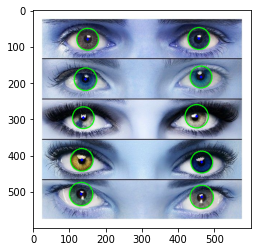

Las distancias son: [306, 318, 312, 330, 332]


In [4]:
#Se crea un array en el que vamos a dejar las posiciones de los círculos, para luego operar
resp_iris=[]
distancias_iris=[]
#Se dibujan los círculos
circles = cv.HoughCircles(ojosGrisesBlur,cv.HOUGH_GRADIENT,1,minDist=50,param1=120,param2=25,minRadius=25,maxRadius=45)
circles = np.uint16(np.around(circles))
#Dibujamos los círculos sobre una imagen
for i in circles[0,:]:
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
    #Agregamos los círculos al array
    resp_iris.append(i)    
    #print(i[0],i[1])

sorted_list_iris = sorted(resp_iris, key=lambda x:x[1])
print('la nueva lista es',sorted_list_iris)

#Finalmente leemos del array para calcular las distancias
longitud=len(resp_iris)
for iterador in range(0,longitud,2):
  distancia=(sorted_list_iris[iterador][0])-(sorted_list_iris[iterador+1][0])
  if distancia<0 or distancia>1000:
    distancia=(sorted_list_iris[iterador+1][0])-(sorted_list_iris[iterador][0])
  distancias_iris.append(distancia)

plt.figure()
plt.imshow(img_out)
plt.show()

print('Las distancias son:',distancias_iris)

la nueva lista es [array([454,  80,  12], dtype=uint16), array([150,  80,  11], dtype=uint16), array([460, 180,  11], dtype=uint16), array([144, 188,  10], dtype=uint16), array([446, 294,  10], dtype=uint16), array([ 52, 294,  12], dtype=uint16), array([136, 414,  12], dtype=uint16), array([462, 420,  11], dtype=uint16), array([132, 506,  13], dtype=uint16), array([464, 516,  12], dtype=uint16)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ushort_scalars


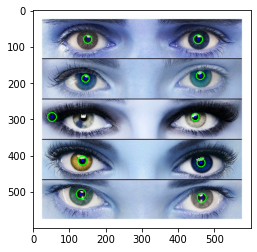

Las distancias son: [304, 316, 394, 326, 332]


In [5]:
#Se crea un array en el que vamos a dejar las posiciones de los círculos, para luego operar
resp_pupilas=[]
distancias_pupilas=[]
#Se dibujan los círculos
circles = cv.HoughCircles(ojosGrisesBlur,cv.HOUGH_GRADIENT,1,minDist=50,param1=120,param2=20,minRadius=6,maxRadius=19)
circles = np.uint16(np.around(circles))
#Dibujamos los círculos sobre una imagen
for i in circles[0,:]:
    cv.circle(img_pupilas,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(img_pupilas,(i[0],i[1]),2,(0,0,255),3)
    #Agregamos los círculos al array
    resp_pupilas.append(i)    
    #print(i[0],i[1])

sorted_list = sorted(resp_pupilas, key=lambda x:x[1])
print('la nueva lista es',sorted_list)

#Finalmente leemos del array para calcular las distancias
longitud=len(resp_pupilas)
for iterador in range(0,longitud,2):
  distancia=(sorted_list[iterador][0])-(sorted_list[iterador+1][0])
  if distancia<0 or distancia>1000:
    distancia=(sorted_list[iterador+1][0])-(sorted_list[iterador][0])
  distancias_pupilas.append(distancia)

plt.figure()
plt.imshow(img_pupilas)
plt.show()

print('Las distancias son:',distancias_pupilas)